<a href="https://colab.research.google.com/github/r-diazp/DeepL/blob/master/QLearning_burrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

[Q-learning](https://huggingface.co/blog/deep-rl-q-part1)


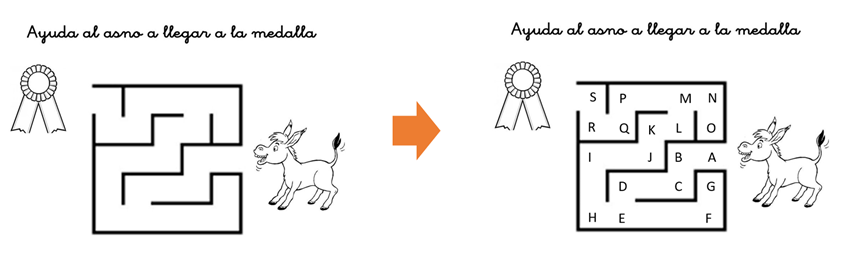

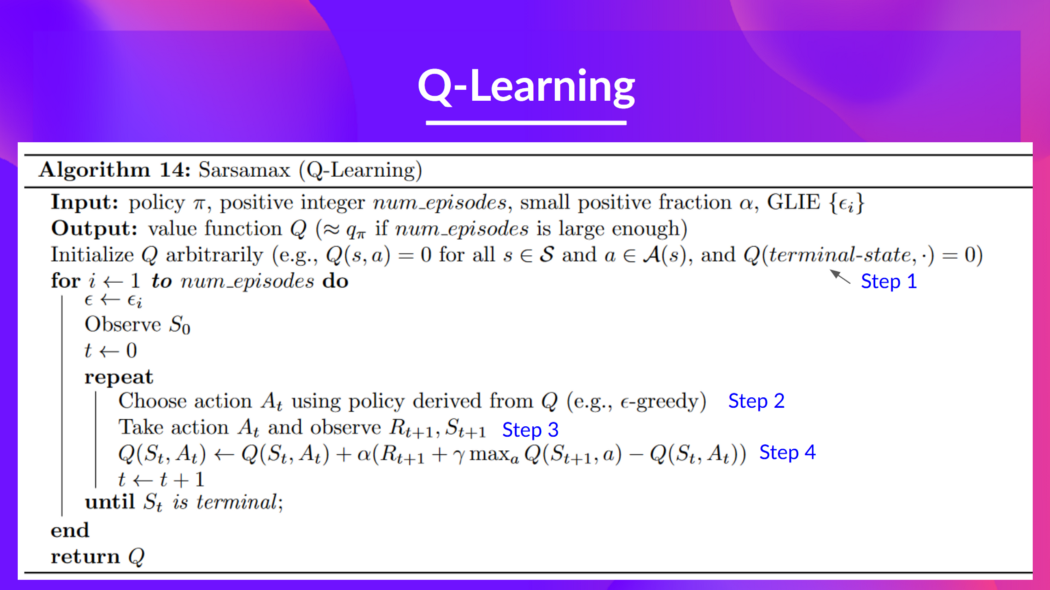

In [ ]:
#LOAD REWARDS
file_path = '/content/drive/MyDrive/Dataset/files/laberinto/matriz-burrito.xlsx'
rewards = pd.read_excel(file_path, header=1, sheet_name='matriz')
rewards = np.array(rewards.iloc[:, 2:]).astype(int)

#LOAD LOCATION_TO_STATE
location_to_state = pd.read_excel(file_path, sheet_name='state').astype(int)
location_to_state = location_to_state.to_dict('records', )[0]

#LOAD ACCTIONS
actions = list(range(len(location_to_state)) )


gamma = 0.7
alpha = 0.9

In [ ]:
print(f'REWARDS:\n {rewards} \n\nLOCATION_TO_STATE\n{location_to_state} \n\nACCTIONS\n {actions}')

REWARDS:
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]] 

LOCATION_TO_STATE
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18} 

ACCTIONS
 [0, 1, 2, 3, 4, 

In [176]:
state_to_location = {state: location for location, state in location_to_state.items()} #Change order in location_to_state, first state and after location 
def best_route(starting_location, ending_location, reward=1000, iterations = 1000):
    # Defining the rewards
    R_new = np.copy(rewards)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = reward
    
    #For all couples of states s and actions a, the Q-Values are initialized to 0:
    Q = np.array(np.zeros([len(location_to_state), len(location_to_state)]))
    #print('REWARDS:\n', R_new.astype(int))    
    
    
    #BUILDING THE AI SOLUTION WITH Q-LEARNING
    for i in range(iterations):
        current_state = np.random.randint(0, len(location_to_state))
        playable_actions = []
        
        for column in range(len(location_to_state)):
            if R_new[current_state, column] > 0:
                playable_actions.append(column)
        next_state = np.random.choice(playable_actions)
        
        #We compute the Temporal Difference
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        
        #We update the Q-value by applying the Bellman equation:
        Q[current_state, next_state] +=  alpha * TD
    #print('\nREWARDS VALUES (Q):\n', Q.astype(int))
    
    
    #ROUTE MAPPING
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location    
    return print(f'\nTHE ROUTE IS: {route} \n\n{pd.DataFrame(Q.astype(int) )}')
     

In [177]:
best_route('O', 'S')



THE ROUTE IS: ['O', 'N', 'M', 'P', 'Q', 'R', 'S'] 

    0   1   2   3   4   5   6   7    8    9    10   11   12   13   14   15  \
0    0  25   0   0   0   0   0   0    0    0    0    0    0    0    0    0   
1   15   0  34   0   0   0   0   0    0    0    0    0    0    0    0    0   
2    0  25   0  47   0   0   0   0    0    0    0    0    0    0    0    0   
3    0   0  34   0  67   0   0   0    0    0    0    0    0    0    0    0   
4    0   0   0   0   0  48   0  97    0    0    0    0    0    0    0    0   
5    0   0   0   0  67   0  34   0    0    0    0    0    0    0    0    0   
6    0   0   0   0   0  48   0   0    0    0    0    0    0    0    0    0   
7    0   0   0   0  68   0   0   0  137    0    0    0    0    0    0    0   
8    0   0   0   0   0   0   0  95    0  195    0    0    0    0    0    0   
9    0   0   0   0   0   0   0   0  137    0  277    0    0    0    0    0   
10   0   0   0   0   0   0   0   0    0  195    0  394    0    0    0    0   
11   0   0 